# Introduction
Bayesian filtering provides a framework to solve linear and non-linear stochastic systems. Due to their flexible nature, bayesian filtering methods are being implemented in various fields such as economics, robotics  and biology  amongst others. Using the baysian approach allows the estimation problem to be solved in a recursive manner. Consequently, a model is able to update it's parameters with each new observation. The ability to monitor the developement of the state of a system is a key advantage of bayesian filtering methods over other methods such as classical linear regression.

Bayesian filtering refers to a broad class of methods. There are several different bayesian filtering methods which can broadly be devided into gaussian and non gaussian methods. A model is classified as gaussian, when any finite number of linear combinations of random variables follows a multivariate normal distribution. Here we considere two gaussian methods, the Kalman-Filter, the Extended-Kalman-Filter and the Particle-Filter, which is a non gaussian method. 

Bayesian filters originate in optimal control theory. Thus historically the control theory notation has been used to describe Bayesian filtering models, which is divergent from other fields. The above mentioned models are generally referred to as state-space models. The state is set of unknown parameters of which the system depends, and the state-space is the set of all possible values the state can have. The model describes the relationship between unobserved states and observed measurements.

This presentation is structured as following: section 2 presents the key derivations of the state-space model equations. Section three revisits matrix algebra followed and section four the properties of the multivariate gaussian distribution. The matrix algebra and the multivariate gaussian distribution are essential in deriving the Kalman-Filter equations, which are presented in section five. In section six the key equations and their derivations of the Extended-Kalman-Filter are presented. Finally, section seven presents an introduction to the Particel-Filter. The paper ends with a short conclusion that summarizes the main ideas of this paper.

# The state-space model

\begin{equation*} 
    \begin{aligned}
        \textbf{x}_t &\sim p(\textbf{x}_t|\textbf{x}_{t-1}) \\
        \textbf{y}_t &\sim p(\textbf{y}_t|\textbf{x}_t)
    \end{aligned}    
\end{equation*}    


where the state $\textbf{x}_t$ is assumed to have the Markov property, meaning that no other dependencies than the ones specified above exist. The variable $\textbf{y}_t$ is the variable of interest, also referred to as the observation or measurement. For the purpose of conducting inference on the state using measurements, the quantity of interest is the posterior distribution if the current state, given all measurements $\textbf{y}_{1:t}$:

\begin{equation*} 
    p(\textbf{x}_t|\textbf{y}_{1:t}) 
\end{equation*}

The process of calculating these quantities begins with the assumption that the previous value $p(\textbf{x}_{t-1}|\textbf{y}_{t-1})$ is known. Then using the fact that:

\begin{equation*} 
    \begin{aligned}
        p(\textbf{x}_{t}, \textbf{x}_{t-1}|\textbf{y}_{1:t-1}) &= p(\textbf{x}_{t}|\textbf{y}_{1:t-1}, \textbf{x}_{t-1}) p(\textbf{x}_{t-1} |\textbf{y}_{1:t-1}) \\
                                                               &= p(\textbf{x}_{t}|\textbf{x}_{t-1}) p(\textbf{x}_{t-1} |\textbf{y}_{1:t-1})                               
    \end{aligned}
\end{equation*}

where $p(\textbf{x}_{t}|\textbf{y}_{1:t-1}, \textbf{x}_{t-1}) = p(\textbf{x}_{t}|\textbf{x}_{t-1})$ by assuming the Markov property holds. This equality decomposes the problem of calculating the probability of observing past and current state conditional on previous measurements into a part which is assumed to be known $p(\textbf{x}_{t-1} |\textbf{y}_{1:t-1})$ and one for which there is a model $p(\textbf{x}_{t}|\textbf{x}_{t-1})$. The next step is called prediction and consists of calculating:

\begin{equation*} 
    \begin{aligned}
        p(\textbf{x}_{t}| \textbf{y}_{1:t-1}) &= \int p(\textbf{x}_{t}, \textbf{x}_{t-1}| \textbf{y}_{1:t-1}) \textbf{dx}_{t-1} \\
                                              &= \int p(\textbf{x}_{t}|\textbf{x}_{t-1}) p(\textbf{x}_{t-1} |\textbf{y}_{1:t-1}) \textbf{dx}_{t-1}
    \end{aligned}
\end{equation*}

because $p(\textbf{x}_{t}, \textbf{x}_{t-1}|\textbf{y}_{1:t-1}) = p(\textbf{x}_{t}|\textbf{x}_{t-1}) p(\textbf{x}_{t-1} |\textbf{y}_{1:t-1})$ (Kolmogorov-Chapman equation) and the fact for two random variables $X,Y$ and for an arbitrary density function $f_{X,Y}$:
\begin{equation*}
    f_X(x) = \int f_{X,Y}(x,y) dy
\end{equation*}

With new measurements $\textbf{y}_t$ being observed, using the Bayes' theorem and the fact that $p(\textbf{y}_{1:t}) = p(\textbf{y}_t, \textbf{y}_{1:t-1})$ the quantity $p(\textbf{x}_t|\textbf{y}_{1:t})$ and can be reformulated as:

\begin{equation*} 
    \begin{aligned}
        p(\textbf{x}_t|\textbf{y}_{1:t}) &=  p(\textbf{x}_t|\textbf{y}_{t}, \textbf{y}_{1:t-1}) \\
                                         &=  \frac{p(\textbf{y}_{t}|\textbf{x}_t, \textbf{y}_{1:t-1}) p(\textbf{x}_t| \textbf{y}_{1:t-1}) }{p(\textbf{y}_{t}|\textbf{y}_{1:t-1})} \\
                                         &= \frac{p(\textbf{y}_{t}|\textbf{x}_t) p(\textbf{x}_t| \textbf{y}_{1:t-1}) }{\int p(\textbf{y}_{t}|\textbf{x}_{t})p(\textbf{x}_t
                                         |\textbf{y}_{1:t-1}) \textbf{dx}_t} \\
    \end{aligned}
\end{equation*}



# Matrix Algebra

## Matrix Inversion
This section presents matrix lemmas that are helpful in deriving the equations for the Kalman-Filter equations. 
Let $A \in \mathbb{R}^{n \times n}$, $D \in \mathbb{R}^{m \times m}$, $B \in \mathbb{R}^{n \times m}$ and $C \in \mathbb{R}^{m \times n}$ and:

$$
\begin{equation*}
        M = \begin{pmatrix}
            A & B \\ 
            C & D \\ 
        \end{pmatrix}, 
        M^{-1} = \begin{pmatrix}
            E & F \\ 
            G & H \\ 
        \end{pmatrix}
\end{equation*}
$$

such that:

$$
\begin{equation*} 
    \begin{pmatrix}
        A & B \\ 
        C & D \\ 
    \end{pmatrix} 
    \begin{pmatrix}
        E & F \\ 
        G & H \\ 
    \end{pmatrix} = 
    \begin{pmatrix}
        I_n & O \\ 
        O & I_m \\ 
    \end{pmatrix} 
\end{equation*}
$$

then assuming $A$ and $D$ are invertible: 
$$
\begin{equation*} 
    \begin{aligned}
        E &= (A - BD^{-1}C)^{-1} \\
        H &= (D - CA^{-1}B)^{-1} \\
    \end{aligned}
\end{equation*}
$$

and 

$$
\begin{equation*}
    \begin{aligned}
        F &= - (A - BD^{-1}C)^{-1}BD^{-1} = - A^{-1}B(D - CA^{-1}B)^{-1} \\
        G &= - (D - CA^{-1}B)^{-1}CA^{-1} = - D^{-1}C(A - BD^{-1}C)^{-1} \\
    \end{aligned}
\end{equation*}
$$

and

$$
\begin{equation*}
    \begin{aligned}
        (A - BD^{-1}C)^{-1} &= A^{-1} + A^{-1}B(D - CA^{-1}B)^{-1}CA^{-1} \\
        (D - CA^{-1}B)^{-1} &= D^{-1} + D^{-1}C(A - BD^{-1}C)^{-1}BD^{-1} \\
    \end{aligned}
\end{equation*}
$$


## Matrix Decomposition
Given the previous assumptions:
$$
\begin{equation*}
    \begin{aligned} M = 
        \begin{pmatrix}
            A & B \\ 
            C & D \\ 
        \end{pmatrix} &= 
        \begin{pmatrix}
            I & B \\ 
            O & D \\ 
        \end{pmatrix} \begin{pmatrix}
            A - BD^{-1}C & O \\ 
            D^{-1}C & I \\             
        \end{pmatrix} \\
        &= \begin{pmatrix}
            A & O \\ 
            C & I \\ 
        \end{pmatrix} \begin{pmatrix}
            I & A^{-1}B \\ 
            O & D - CA^{-1}B \\             
        \end{pmatrix} 
    \end{aligned}
\end{equation*}
$$

It follows that:
$$
\begin{equation*}
    \begin{aligned}
    |det(M)|  &= |det(D)||det(A - BD^{-1}C)| \\
                &= |det(A)||det(D - CA^{-1}B)|
    \end{aligned}
\end{equation*}
$$

# Gaussian Distribution

In the following key properties of the gaussian distribution will be presented.

A random variable $Z \in \mathbb{R}$ is following a gaussian distribution if, its density is defined as:
$$
\begin{equation*}
    f_Z(z) = \frac{1}{\sqrt{2\pi}} exp(-\frac{z^2}{2})
\end{equation*}
$$

and the joint density of identical, independently distributed (iid) gaussians is:
$$
\begin{equation*} 
    \begin{aligned}
        f_{Z_1,...,Z_n}(z_1,...,z_n) &= \prod_{i=1}^n \frac{1}{\sqrt{2\pi}} exp(-\frac{z_i^2}{2}) \\
                      &= (2\pi)^{-\frac{n}{2}}exp(-\frac{\sum_{i=1}^nz^2}{2}) \\
                      &= (2\pi)^{-\frac{n}{2}}exp(-\frac{\textbf{(z - 0)}^T \textbf{I}_n \textbf{(z - 0)}}{2}) 
    \end{aligned}
\end{equation*}
$$

which is the product density and thus itself a density (without proof) and will be referred to as a multivariate gaussian distribution with $\textbf{0}$ mean and $I_n$ as the covariance matrix, in short:

$$
\begin{equation*} 
        \textbf{Z} = (Z_1,...,Z_n) \sim \mathcal{N}(\textbf{0}, \textbf{I}_n)
\end{equation*}
$$

The multivariate gaussian has the property that linear transformations follow again a multivariate gaussian distribution. The proof of this theorem requires the transformation theorem for integrals and the diagonalization of symmetric matrices theorem.

If $\Sigma \in \mathbb{R}^{n\times n}$, $\Sigma = \Sigma^T$, $Z = (Z_1,..., Z_n) \sim \mathcal{N}(\textbf{0}, \textbf{I}_n)$, $\mu = (\mu_1,..., \mu_n), \mu_i \in \mathbb{R}$ and
$\textbf{X} = \Sigma^{\frac{1}{2}} \textbf{Z} + \mu$ then:
$$
\begin{equation*}
    \textbf{X} \sim \mathcal{N}(\mu, \Sigma)
\end{equation*} 
$$

Thus $\textbf{X}$ follows a multivariate gaussian distribution with mean $\mu$ and covariance $\Sigma$. 

Following the exact same reasoning and under the same assumptions as previously and if $A \in \mathbb{R}^{k \times n}$ with $AA^{-1} = I$ then: 

$$
\begin{equation*}
    \textbf{Y} = A\textbf{X} + b \sim \mathcal{N}(A\mu, A\Sigma A^T)
\end{equation*}
$$

This equation will be referred to as the reproductive property of the multivariate gaussian distribution. The key takeaway from this section is that linear transformations of multivariate gaussian distributions are themselves multivariate gaussian distributed. 

Under the same assumptions as in Lemma 4.1 and if $X \sim \mathcal{N}(\mu_X, \Sigma_X)$ and $Y \sim \mathcal{N}(\mu_Y, \Sigma_Y)$, then:
$$
\begin{equation*} 
    \begin{aligned} 
        X|Y \sim \mathcal{N}(\mu_x + \Sigma_{X,Y}\Sigma_Y^{-1}(\textbf{y}-\mu_Y), (\Sigma_X - \Sigma_{X,Y}\Sigma_Y^{-1}\Sigma_{Y,X})) \\
        Y|X \sim \mathcal{N}(\mu_Y + \Sigma_{X,Y}^T\Sigma_X^{-1}(\textbf{x}-\mu_X), (\Sigma_Y - \Sigma_{Y,X}\Sigma_X^{-1}\Sigma_{X,Y})) 
    \end{aligned}
\end{equation*}
$$
These distribution can be derived from the matrix inversion lemma and the Woodbury formula. These conditional posterior distributions are the basis for the Kalman-Filter.

# Kalman Filter

The Kalman-Filter is a method to estimate dynamic linear systems with gaussian noise. Gaussian noise can be additive or take other functional forms. In this analysis we are only considering the case for additive noise. The system is assumed to take the following form:

$$
\begin{equation*} 
    \begin{aligned}
        \textbf{x}_t &= \textbf{A}_{t-1} \textbf{x}_{t-1} + \textbf{q}_{t-1},\ \textbf{q}_{t-1} \sim \mathcal{N}(\textbf{0},\textbf{Q}_{t-1}) \\
        \textbf{y}_t &= \textbf{H}_t\textbf{x}_t + \textbf{r}_t, \ \textbf{r}_t \sim \mathcal{N}(\textbf{0},\textbf{R}_{t})          
    \end{aligned}
\end{equation*}
$$

where $\textbf{x}_t \in \mathbb{R}^n$ is the state and $\textbf{y}_t \in \mathbb{R}^m$ is the measurement. This equation describes the state and process dynamics. The transition between the current and past state is captured through  $\textbf{A}_{t-1}$ and the relation between the current state and the measurement is captured by $\textbf{H}_t$, where $\textbf{r}_t$ is the measurement noise. Both $q_{t-1}$ and $r_t$ are assumed to be independent.


## Prediction Step
For the purpose of solving the baysian filtering problem, we are interested in calculating first $p(\textbf{x}_t|\textbf{y}_{1:t-1})$, which we can calculate directly using the reproductive property of the gaussian distribution. Assuming: $\textbf{x}_{t-1}|\textbf{y}_{1:t-1} \sim  \mathcal{N}(\mu_{x_{t-1}}, \Sigma_{x_{t-1}} )$:

$$
\begin{equation*}
    \begin{aligned}
        \textbf{m}_t &:=\textbf{A}_{t-1}\mu_{x_{t-1}} \\
        \textbf{C}_t &:= \textbf{A}_{t-1}\Sigma_{x_{t-1}}\textbf{A}_{t-1}^T + \textbf{Q}_{t-1} \\
\end{aligned}
\end{equation*}
$$


then:
$$
\begin{equation}
    \begin{aligned}
        \textbf{x}_t|\textbf{y}_{1:t-1}  &\sim \mathcal{N}(\textbf{m}_t, \textbf{C}_t) \\
\end{aligned}
\end{equation}
$$

This step is also referred to as the "prediction step".

## Update
Next we calculate $p(\textbf{y}_t|\textbf{x}_t, \textbf{y}_{1:t-1})$ by applying the reproductive property again and obtain:

$$
\begin{equation}
    \begin{aligned}
        \textbf{y}_t|\textbf{x}_t, \textbf{y}_{1:t-1} &\sim \mathcal{N}(\textbf{H}_{t}\textbf{m}_t, \textbf{H}_t\textbf{C}_t\textbf{H}_t^T + \textbf{R}_{t}) \\
    \end{aligned}
\end{equation}
$$

To calculate $p(\textbf{x}_t|\textbf{y}_{1:t})$, we first calculate the joint distribution $p(\textbf{x}_t, \textbf{y}_t|\textbf{y}_{1:t-1})$:

$$
\begin{equation} 
    \begin{aligned} 
        \textbf{x}_t, \textbf{y}_t|\textbf{y}_{1:t-1} &\sim \mathcal{N}
        \begin{pmatrix}
            \begin{pmatrix}
                \textbf{m}_t \\
                \textbf{H}_{t}\textbf{m}_t
            \end{pmatrix}, 
            \begin{pmatrix}
                \textbf{C}_t & \textbf{C}_t\textbf{H}_{t}^T \\
                \textbf{H}_{t}\textbf{C}_t^T & \textbf{H}_t\textbf{C}_t\textbf{H}_t^T + \textbf{R}_{t}
            \end{pmatrix}
        \end{pmatrix}
    \end{aligned}
\end{equation}
$$

Where:
$$
\begin{align*}
    cov(\textbf{x}_t, \textbf{y}_t|\textbf{y}_{1:t-1}) &= cov(\textbf{x}_t, \textbf{H}_t\textbf{x}_t + r_t|\textbf{y}_{1:t-1}) \\
                                                       &= cov(\textbf{x}_t, \textbf{H}_t\textbf{x}_t|\textbf{y}_{1:t-1}) + cov(\textbf{x}_t + r_t|\textbf{y}_{1:t-1}) \\
                                                       &= cov(\textbf{x}_t, \textbf{H}_t\textbf{x}_t|\textbf{y}_{1:t-1}) \\
                                                       &= \textbf{C}_t\textbf{H}_{t}^T
\end{align*}
$$

where $cov(\textbf{x}_t + r_t|\textbf{y}_{1:t-1}) = 0$ due to the independence between $\textbf{x}_t$ and $r_t$. Then we obtain: 

$$
\begin{align*}
    \mu_t& := \textbf{m}_t + \textbf{C}_t\textbf{H}_{t}^T(\textbf{H}_t\textbf{C}_t\textbf{H}_t^T + \textbf{R}_{t})^{-1}(\textbf{y}_t - \textbf{H}_{t}\textbf{m}_t) \\
    \Sigma_t&:= (\textbf{C}_t - \textbf{C}_t\textbf{H}_{t}^T(\textbf{H}_t\textbf{C}_t\textbf{H}_t^T + \textbf{R}_{t})^{-1}\textbf{H}_{t} \\
\end{align*}    
$$
and thus:

$$
\begin{equation}
    \textbf{x}_t|\textbf{y}_t, \textbf{y}_{1:t-1} \sim \mathcal{N}(\mu_t, \Sigma_t) \\
\end{equation}
$$

Thus we obtained a closed form solution for the linear dynamic stochastic model. 

## Algorithm
To summarize the algorithm:


* predict: 
    * $\textbf{m}_t =\textbf{A}_{t-1}\mu_{x_{t-1}}$
    * $\textbf{C}_t = \textbf{A}_{t-1}\Sigma_{x_{t-1}}\textbf{A}_{t-1}^T + \textbf{Q}_{t-1}$
* update:
    * $\nu_t = \textbf{y}_t - \textbf{H}_{t}\textbf{m}_t$ 
    * $\textbf{S}_t = \textbf{H}_t\textbf{C}_t\textbf{H}_t^T + \textbf{R}_{t}$
    * $\textbf{K}_t = \textbf{C}_t\textbf{H}_{t}^T\textbf{S}_t^{-1}$
    * $\mu_t = \textbf{m}_t + \textbf{K}_t\nu_t$
    * $\Sigma_t = \textbf{C}_t-\textbf{K}_t\textbf{S}_t\textbf{K}_t^T$


In [2]:
##################################################################################################################
##################################################################################################################
##################################################################################################################


# Author: Vincent Grunert
# Content: R Code generated the simulations for 
# "Extended- Kalman and Particle Filter" 



##################################################################################################################
##################################################################################################################
##################################################################################################################


##################################################################################################################
#############################      FUNCTION     DEFINITIONS      #################################################
##################################################################################################################


#####
# generating samples from the multivariate normal distribution 
mvnorm <- function(n, mu, covar){
    return((t(chol(covar)) %*% rnorm(n)) + mu)
}
#####

#####
# kalman filter equations inplementation
# the implementation is slightly different for vector inputs then matrix inputs
# which is why it requires two different "inner" implementations
kalman_filter <- function(measurements, stateTransition, processNoise,
    outputMatrix, measurementNoise){    

    # vector input 
    if(is.vector(measurements)){

        # number of measurements
        n <- length(measurements)

        # number of states
        n_state <- ncol(stateTransition)

        # init state matrix
        state <- matrix(0, ncol=n_state, nrow=n)

        # use first measurement as init state
        state[1, ] <- c(measurements[1], rep(0, n_state - 1))

        # init state covariance matrix
        S <- diag(rep(10, n_state))

        # kalman filter equations 
        for(i in 2:n){
            # predict
            m_ <- stateTransition %*% state[i-1, ]
            S_ <- stateTransition %*% S %*% t(stateTransition) + processNoise

            # update
            S <- outputMatrix %*% S_ %*% t(outputMatrix) + measurementNoise
            K <- S_ %*% t(outputMatrix) %*% solve(S)
            m <- m_ + K %*% (measurements[i] - outputMatrix %*% m_)
            S <- S_ - K %*% S %*% t(K)

            # save
            state[i,] <- m
        }
    }
    if(is.matrix(measurements)){

        # number of measurements
        n_measure <- nrow(measurements)

        # number of states
        n_state <- ncol(stateTransition)

        # init state 
        state <- matrix(0, ncol=n_state, nrow=n_measure)

        # use first measurement as init state
        state[1, ] <- c(measurements[1,], rep(0, n_state - ncol(measurements)))

        # state covariance matrix
        S <- diag(rep(10, n_state))

        # kalman filter equations
        for(i in 2:n){
            # predict
            m_ <- stateTransition %*% state[i-1, ]
            S_ <- stateTransition %*% S %*% t(stateTransition) + processNoise

            # update
            S <- outputMatrix %*% S_ %*% t(outputMatrix) + measurementNoise
            K <- S_ %*% t(outputMatrix) %*% solve(S)
            m <- m_ + K %*% (measurements[i,] - outputMatrix %*% m_)
            S <- S_ - K %*% S %*% t(K)

            # save
            state[i,] <- m
        }
    }
    # return state  
    return(state)
}
#####

#####
# functions usind in deriving the recursive non linear regression extended kalman-filter solution
# exponential model with one variable
h <- function(x, beta) { exp(x*beta) }

# derivative of the exponential function w.r.t. the state
H <- function(x, beta) { h(x, beta)/x }
#####

#####
# functions for the importance sampling example
# function of the random variable
f <- function(x) {cos(x)^2 }

# normal density
d_norm  <- function(x, mu=0, sig=1) {1/sqrt(2*pi)*exp(- (x-mu)^2/(2*sig^2))}

# laplace distribution density
dlaplace <- function(x, b=1, mu =0){ 1/(2*b)*exp(-abs(x-mu)/b)}

# generate random variables according to the laplace distribution
rlaplace <- function(b, u){
    -b*sign(u-0.5)*log(1 - 2*abs(u-0.5))
}
#####

#####
# state transition function for the particle filter simulation
state_update <- function(x,t) {  0.5*x + 25*x/(1 + x^2) + 8*cos(1.2*(t-1)) }

# measurement / process transition function for the particle filter simulation
measurement_update <- function(x) { x^2/20 }
#####

#####
# state transition function for the particle filter simulation
stochastic_volatility_state  <- function(x, a, b) { a + b * x }

# measurement / process transition function for the particle filter simulation
stochastic_volatility_process  <- function(state) { exp(state) }
#####


##################################################################################################################
#############################    FUNCTION   DEFINITIONS   END    #################################################
##################################################################################################################

The following three figures present the results of the Kalman-Filter estimation of three different stochastic systems. A thourough statistical performance evaluation will be omitted at this point, and we are going to limit the evaluation to the visual inspection of the results. Figure 1 presents a constant model with gaussian noise, which changes its mean over time. Figure 2 represents sine measurements with gaussian noise, which is a non-linear stochastic process. Figure 3 depicts a random walk in two dimensions, where movement in either direction is dependent on the previous position plus gaussian noise.   

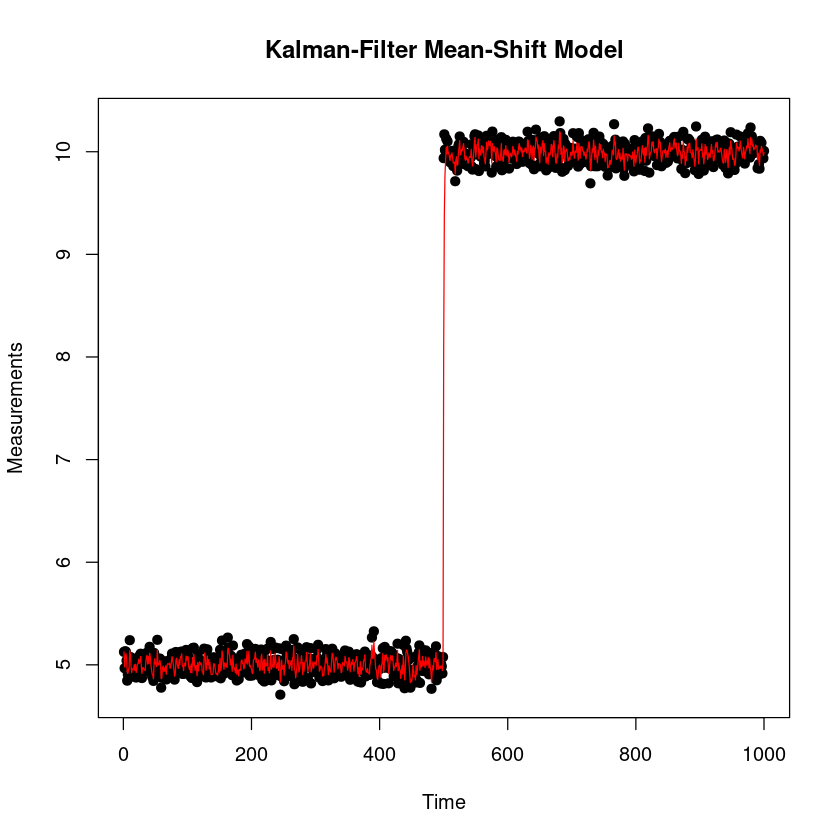

In [7]:
##################################################################################################################
#############################      KALMAN FILTER SIMULATIONS     #################################################
##################################################################################################################

# generate n constant measurements whose mean changes after n/2 measurements
# random seed
set.seed(0)

# init n
n <- 1000

# save results
time_var_const_mean <- numeric(n)

# generate time depended constant data with gaussian noise
for(i in 1:n){
        time_var_const_mean[i] <- rnorm(1, mean = 5, sd = 0.1)
    if( i < n/2){
    } else {
        time_var_const_mean[i] <- rnorm(1, mean = 10, sd = 0.1)
    }
}

# apply the kalman filter
kf_const_time_var_mean <- kalman_filter( measurements = time_var_const_mean, stateTransition = matrix(c(1,1, 0,1), ncol = 2), 
    processNoise = diag(rep(1,2)), outputMatrix = matrix(c(1,0), ncol = 2),  measurementNoise = matrix(1, ncol=1)
)

plot(time_var_const_mean, pch=19, 
    main = "Kalman-Filter Mean-Shift Model",
    xlab = "Time",
    ylab = "Measurements")
lines(kf_const_time_var_mean[,1], col='red')

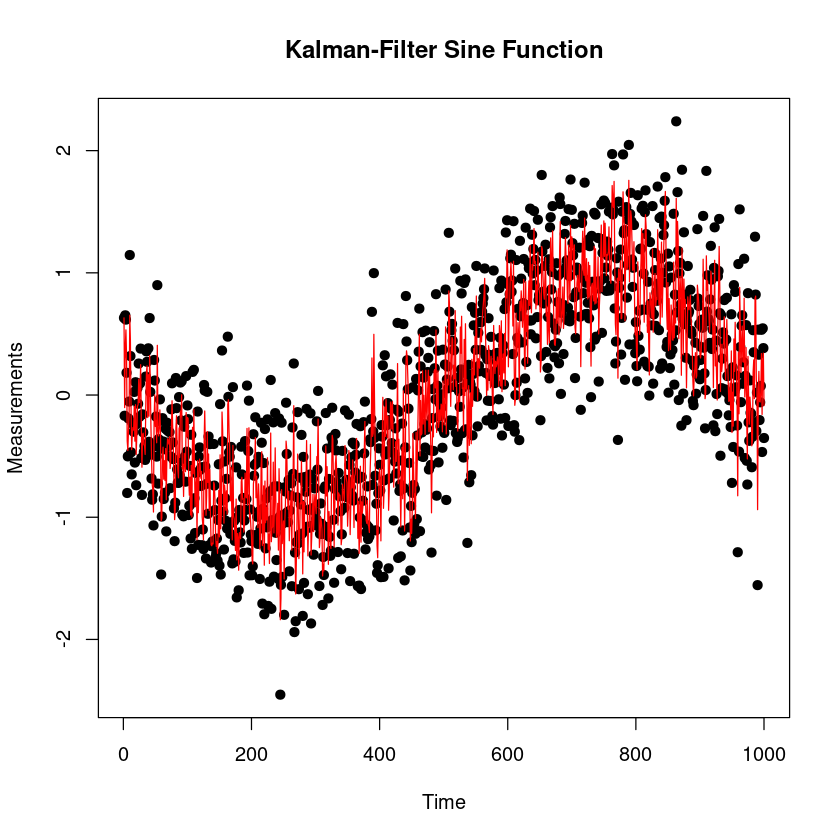

In [8]:
# second k-f example using sine function with additive gaussian noise 
set.seed(0)

# generate data
sine <- sin(seq(-pi, pi, length.out=n)) + rnorm(n,sd=0.5)

# apply k-f
kf_sine <- kalman_filter(measurements = sine, stateTransition = matrix(c(1,1, 0,1), ncol = 2), processNoise = diag(rep(1,2)), 
    outputMatrix = matrix(c(1,0), ncol = 2), measurementNoise = matrix(1, ncol=1)
)

plot(sine, pch=19, 
    main = "Kalman-Filter Sine Function",
    xlab = "Time",
    ylab = "Measurements")
lines(kf_sine[,1], col='red')

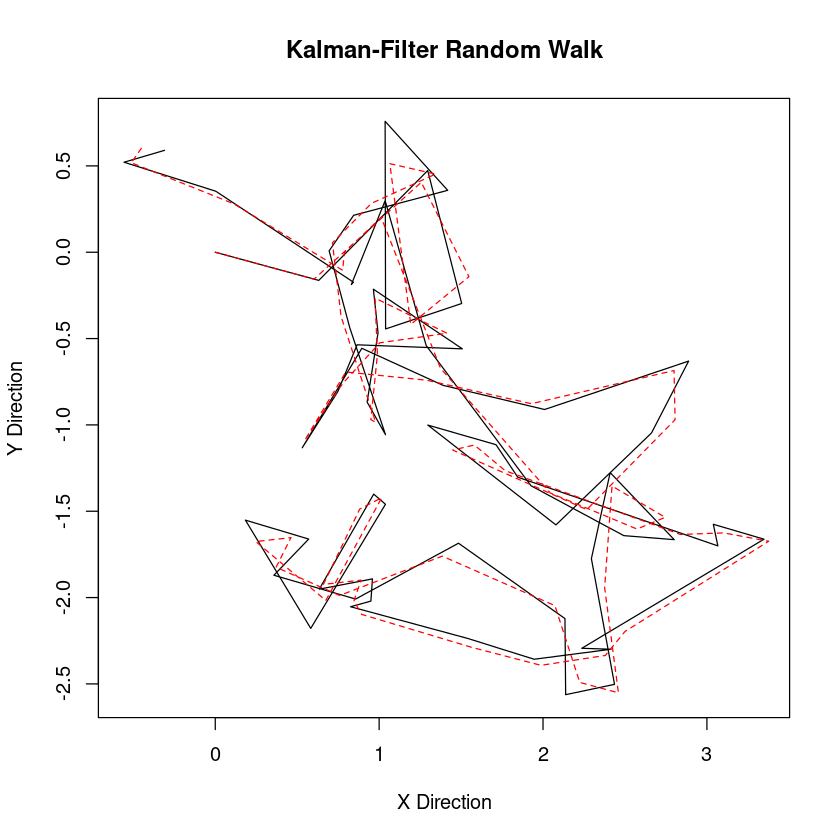

In [10]:
# generate two dimensional random walk, where the current position depends only on the previous one
set.seed(0)

# save data
random_walk <- matrix(0, ncol=2, nrow=n)

# generte random walk
for(i in 2:n){
    random_walk[i, 1] <- random_walk[i-1, 1] + rnorm(1, sd=0.5)
    random_walk[i, 2] <- random_walk[i-1, 2] + rnorm(1, sd=0.5)
}

# apply k-f
kf_random_walk <- kalman_filter(measurements = random_walk, stateTransition = matrix(c(1,0,0,0, 0,1,0,0, 1,0,1,0, 0,1,0,1), ncol = 4), 
    processNoise = diag(rep(1,4)), outputMatrix = matrix(c(1,0, 0,1, 0,0, 0,0), ncol = 4),  measurementNoise = diag(c(1,1))
)

# save grafics
plot(random_walk, type='l',, 
    main = "Kalman-Filter Random Walk",
    xlab = "X Direction",
    ylab = "Y Direction")
lines(kf_random_walk[,1], kf_random_walk[,2], col='red', lty=2)

## Recursive Regression Models

The Kalman-Filter can also be used to recursively estimate the state of a linear regression problem. The recursive solution has the same posterior distribution as the batch solution, but it allows to monitor the evolution of the state. In the following we present a simulation to clarify this point. Using the following model to generate a dependent variable $y_t$ based on the true state $\beta = (2,6)^T$ and measurements $x_t$:

$$
\begin{align*} 
    y_t &= \beta_{1,t} + \beta_{2,t}\cdot x_t + \varepsilon_t, \ \varepsilon_t \sim \mathcal{N}(0,1)
\end{align*}
$$

and the following state-space representation of the model:

$$
\begin{align*}
    \beta_t &= \beta_{t-1} \\
    y_t &= (1, x_t)^T \cdot \beta_t + \varepsilon_t, \ \varepsilon_t \sim \mathcal{N}(0,1)
\end{align*}
$$

The following code generates the respective models.

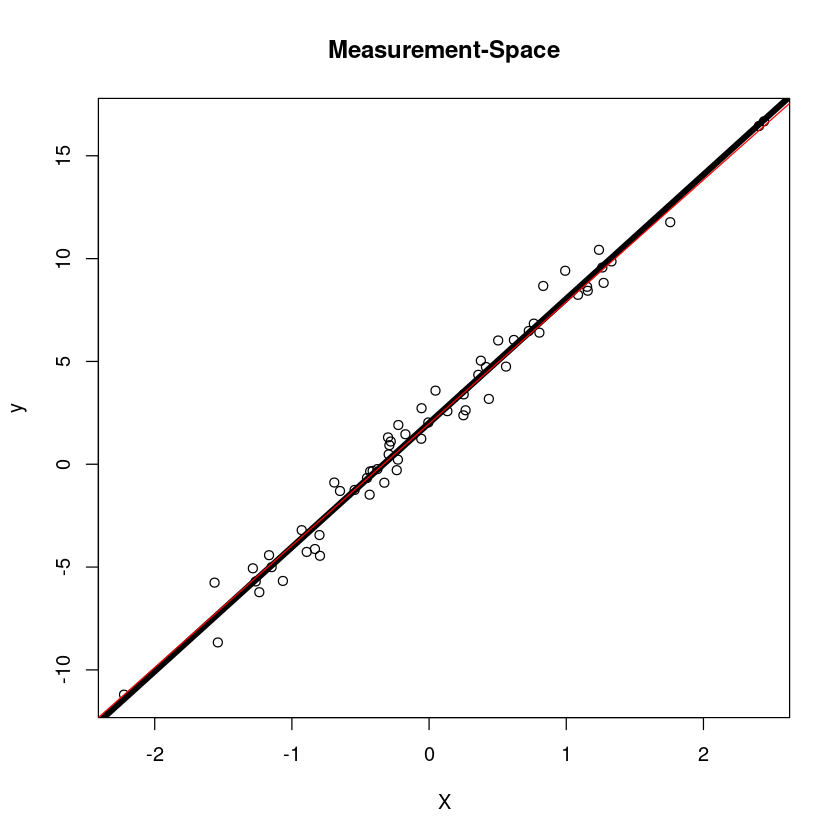

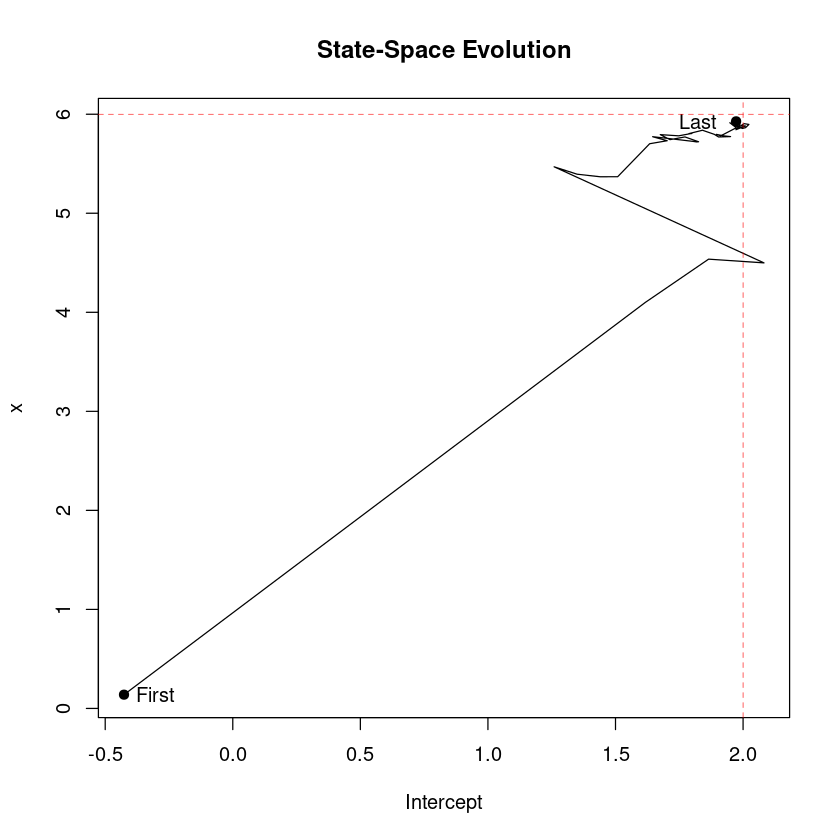

In [13]:
# recursive linear regression
set.seed(0)
# explantatory variables with intercept
X <- cbind(rep(1, n), rnorm(n))

# true state
beta <- c(2, 6)

# gaussian model
y_lin <- rnorm(n, mean= X%*%beta, 1)

# save state
beta_lin_est  <- matrix(0, ncol=n, nrow=2)

# state covariance
Sig <- diag(c(1,1))

# not using the kalman filter function because for recursive regression
# the predict step is not required, thus there is no state transition in this model
# run the equations
for(i in 2:n){
    S  <- X[i,,drop=FALSE] %*% Sig %*% t(X[i,,drop=FALSE]) + 1
    K  <- Sig %*% t(X[i,,drop=FALSE]) / as.numeric(S)
    beta_lin_est[,i]  <- beta_lin_est[,i-1] + K %*% (y_lin[i] - X[i, ] %*% beta_lin_est[,i-1])    
    Sig <- Sig - K%*%S%*%t(K)
}

# save plot
plot(X[,2], y_lin,
    main = "Measurement-Space",
    xlab = "X",
    ylab = "y"
)
abline(lm(y_lin ~ X - 1 )$coefficients[1], lm(y_lin ~ X - 1 )$coefficients[2], lw=5)
abline(beta_lin_est[1, n], beta_lin_est[2,n], col = "red")

# state space
plot(beta_lin_est[1,-1], beta_lin_est[2,-1], 
    main = "State-Space Evolution",
    xlab = "Intercept",
    ylab = "x",
    type = "l"
)
points(beta_lin_est[1, 2], beta_lin_est[2,2], pch=19)
text(beta_lin_est[1, 2], beta_lin_est[2,2], "First", adj = c(-0.3, 0.5))
points(beta_lin_est[1, n], beta_lin_est[2,n], pch=19)
text(beta_lin_est[1, n], beta_lin_est[2,n], "Last", adj = c(1.5, 0.5))
abline(v = 2, lty = 2, lw = 0.5, col = "red")
abline(h = 6, lty = 2, lw = 0.5, col = "red")

##################################################################################################################
#############################    KALMAN FILTER SIMULATIONS END   #################################################
##################################################################################################################

Figure 4 depicts the batch solution as a thick black-, and the recursive solution as a red line. As we can see, the solutions are practically identical. Figure 5 depicts the evolution of the state as additional information becomes available. The red dotted lines represent the true state. As we can see, the recursive solution moves continuously closer to the true state.   

Concluding, the Kalman-Filter is able to estimate linear- as well as non-linear time dependent stochastic processes in multiple dimensions. 

# Extended-Kalman-Filter

The Kalman-Filter is the solution to a linear dynamic stochastic system. If the restriction of linearity is dropped, but  all other assumptions  maintained, the Bayesian filtering problem can be formulated as:

$$
\begin{equation*} 
    \begin{aligned}
        \textbf{x}_t &= \textbf{f}(\textbf{x}_{t-1}) + \textbf{q}_{t-1},\ \textbf{q}_{t-1} \sim \mathcal{N}(\textbf{0},\textbf{Q}_{t-1}) \\
        \textbf{y}_t &= \textbf{g}(\textbf{x}_t) + \textbf{r}_t, \ \textbf{r}_t \sim \mathcal{N}(\textbf{0},\textbf{R}_{t})          
    \end{aligned}
\end{equation*}
$$

The idea behind the Extended-Kalman-Filter is to calculate an approximate solution, rather than an exact one. The main tool to achieve the approximation is the Taylor-Series expansion of $\textbf{f}$ and $\textbf{g}$. As with the derivation of the Kalman-Filter equations, we begin with the prediction step.

## Prediction
According to Taylor's theorem the first order approximation is:

$$
\begin{equation*}
    \begin{aligned}
        \textbf{f}(\textbf{x}_{t-1}) &\approx \textbf{f}(\textbf{m}_{t-1}) + \textbf{F}_x(\textbf{m}_{t-1})(\textbf{x}_{t-1} - \textbf{m}_{t-1})  \\
    \end{aligned}
\end{equation*}
$$

$$
\begin{equation*} 
    \begin{aligned}
        \nu_{t-1} &:= \textbf{f}(\textbf{m}_{t-1}) + \textbf{F}_x(\textbf{m}_{t-1})(\textbf{x}_{t-1} - \textbf{m}_{t-1})\\
    \end{aligned}
\end{equation*}    
$$

where $\textbf{F}_x$ refers to the derivative of $\textbf{f}$ with respect to $\textbf{x}_{t-1}$ and $\textbf{m}_{t-1}$ is assumed to be a known quantity. If we further assume that $(\textbf{x}_{t-1} - \textbf{m}_{t-1}) \sim \mathcal{N}(\textbf{0}, \textbf{C}_{t-1})$, then using Corollary 4.1 and the model assumptions:

$$
\begin{equation*}
    \nu_{t-1} \sim \mathcal{N}(\textbf{f}(\textbf{m}_{t-1}), \textbf{F}_x\textbf{C}_{t-1}\textbf{F}_x^T)
\end{equation*}
$$

and since:

$$
\begin{equation*} 
    \begin{aligned}
        \nu_{t-1} + \textbf{q}_{t-1} &= \begin{pmatrix}
            1,1
        \end{pmatrix}^T\begin{pmatrix}
            \nu_{t-1} \\
            \textbf{q}_{t-1}
        \end{pmatrix} \text{, thus: } \\
        \nu_{t-1} + \textbf{q}_{t-1} &\sim \mathcal{N}\begin{pmatrix}
                \begin{pmatrix}
                    1,1
                \end{pmatrix}^T \begin{pmatrix}
                    \textbf{f}(\textbf{m}_{t-1}) \\
                    \textbf{0}
                \end{pmatrix}, \begin{pmatrix}
                    \begin{pmatrix}
                        1,1
                    \end{pmatrix}^T \begin{pmatrix}
                        \textbf{F}_x\textbf{C}_{t-1}\textbf{F}_x^T & \textbf{0}\\
                        \textbf{0} & \textbf{Q}_{t-1}\\
                    \end{pmatrix} \begin{pmatrix}
                        1,1
                    \end{pmatrix}
                \end{pmatrix}
        \end{pmatrix} \\
    \end{aligned}
\end{equation*}
$$

$$
\begin{equation*}
    \begin{aligned}
        \textbf{m}_t & := \textbf{f}(\textbf{m}_{t-1}) \\
        \textbf{C}_t & := \textbf{F}_x\textbf{C}_{t-1}\textbf{F}_x^T + \textbf{Q}_{t-1}\\        
    \end{aligned}
\end{equation*}
$$

and obtain: 
$$
\begin{equation*}
    \nu_{t-1} + \textbf{q}_{t-1} \sim \mathcal{N}(\textbf{m}_t, \textbf{C}_t)\\
\end{equation*}
$$

Since $\textbf{x}_t| \textbf{y}_{1:t-1}\simeq \nu_{t-1} + \textbf{q}_{t-1}$:
$$
\begin{equation*} 
    \begin{aligned}
        \textbf{x}_t|\textbf{y}_{1:t-1} &\simeq \mathcal{N}(\textbf{m}_t, \textbf{C}_t)\\
        \textbf{x}_t - \textbf{m}_{t}|\textbf{y}_{1:t-1} &\simeq \mathcal{N}(\textbf{0}, \textbf{C}_t)\\
    \end{aligned}
\end{equation*}
$$

The distribution of $\textbf{x}_t - \textbf{m}_{t}|\textbf{y}_{1:t-1}$ is derived by setting $A = I$ and $b = -\textbf{m}_{t}$.  

## Update
The derivation for the update equations follows the same arguments as in the prediction step, by using the information obtained in the prediction step:

$$
\begin{equation*}
    \begin{aligned}
        \textbf{g}(\textbf{x}_{t}) &\approx \textbf{g}(\textbf{m}_{t}) + \textbf{G}_x(\textbf{m}_{t})(\textbf{x}_{t} - \textbf{m}_{t})  \\
    \end{aligned}
\end{equation*}
$$

$$
\begin{equation*} 
    \begin{aligned}
        \gamma_t := \textbf{g}(\textbf{m}_{t}) + \textbf{G}_x(\textbf{m}_{t})(\textbf{x}_{t} - \textbf{m}_{t})
    \end{aligned}
\end{equation*}    
$$

Using same arguments as before, we obtain:

$$
\begin{equation*}
    \textbf{y}_t| \textbf{y}_{1:t-1}\simeq \gamma_t + r_t \sim \mathcal{N}(\textbf{g}(\textbf{m}_{t}), \textbf{G}_x\textbf{C}_t\textbf{G}_x^T + \textbf{R}_t)
\end{equation*}
$$

and thus the joint distribution $p(\textbf{x}_t, \textbf{y}_t| \textbf{y}_{1:t-1})$:

$$
\begin{equation*}
    \begin{pmatrix}
        \textbf{x}_t \\
        \textbf{y}_t
    \end{pmatrix} \sim \mathcal{N} \begin{pmatrix}
        \begin{pmatrix}
            \textbf{m}_t\\
            \textbf{g}(\textbf{m}_{t})\\
        \end{pmatrix}, \begin{pmatrix}
            \textbf{C}_t & \textbf{C}_t \textbf{G}_x^T \\
            \textbf{G}_x\textbf{C}_t & \textbf{G}_x\textbf{C}_t\textbf{G}_x^T + \textbf{R}_t
        \end{pmatrix}
    \end{pmatrix}
\end{equation*}
$$

from which we can calculate the distribution of $\textbf{x}_t|\textbf{y}_{1:t}$:

$$
    \begin{equation*}
        \begin{aligned}
            \mu_t &:= \textbf{m}_t + \textbf{C}_t \textbf{G}_x^T(\textbf{G}_x\textbf{C}_t\textbf{G}_x^T + \textbf{R}_t)^{-1}(\textbf{y}_t - \textbf{g}(\textbf{m}_{t})) \\
            \Sigma_t &:=  \textbf{C}_t - \textbf{C}_t \textbf{G}_x^T(\textbf{G}_x\textbf{C}_t\textbf{G}_x^T + \textbf{R}_t)^{-1}\textbf{G}_x\textbf{C}_t\\
        \end{aligned}
    \end{equation*}
$$
and thus we obtain:

$$
\begin{equation*}
    \textbf{x}_t|\textbf{y}_{1:t}\sim \mathcal{N}(\mu_t, \Sigma_t)
\end{equation*}
$$
Using the first order Taylor series expansion, we obtained a closed form solution to a non-linear dynamic stochastic system.

## Algorithm
To summarize the algorithm:

* predict: 
    * $\textbf{m}_t = \textbf{f}(\textbf{m}_{t-1})$
    * $\textbf{C}_t = \textbf{F}_x\textbf{C}_{t-1}\textbf{F}_x^T + \textbf{Q}_{t-1}$
    
* update:
    * $\nu_t = \textbf{y}_t - \textbf{g}(\textbf{m}_{t})$ 
    * $\textbf{S}_t = \textbf{G}_x\textbf{C}_t\textbf{G}_x^T + \textbf{R}_t$
    * $\textbf{K}_t = \textbf{C}_t \textbf{G}_x^T\textbf{S}_t^{-1}$
    * $\mu_t = \textbf{m}_t + \textbf{K}_t\nu_t$
    * $\Sigma_t = \textbf{C}_t-\textbf{K}_t\textbf{S}_t\textbf{K}_t^T$

## Simulation
The Extended-Kalman-Filter can be used to estimate non-linear regression problems. In this simulation we generated 1000 artificial observations using:

$$
\begin{align*}
    y_t &= exp(\beta \cdot x_t) + \varepsilon_t, \ \varepsilon_t \sim \mathcal{N}(0,1)
\end{align*}
$$
which is a non-linear function of the state, and the following state-space representation of the model:

$$
\begin{align*}
    \beta_t &= \beta_{t-1} \\
    y_t &= exp(\beta_t \cdot x_t) + \varepsilon_t, \ \varepsilon_t \sim \mathcal{N}(0,1)
\end{align*}
$$

Figure 6 presents the generated data in black and the result of the Extended-Kalman-Filter as the red line. As we can see, the Extended-Kalman-Filter captures the $x-y$ relationship for $x \leq 1$ quite well, and for $x > 1$ appears to consistently underestimate the measurements. Figure 7 shows that the state indeed levels out constantly below the true state. This divergence might be due to a misspecified model, which we know is not the case, or due to the fact that large x-values are unlikely to occur, and there is no evidence to support a proper estimation of these values. 

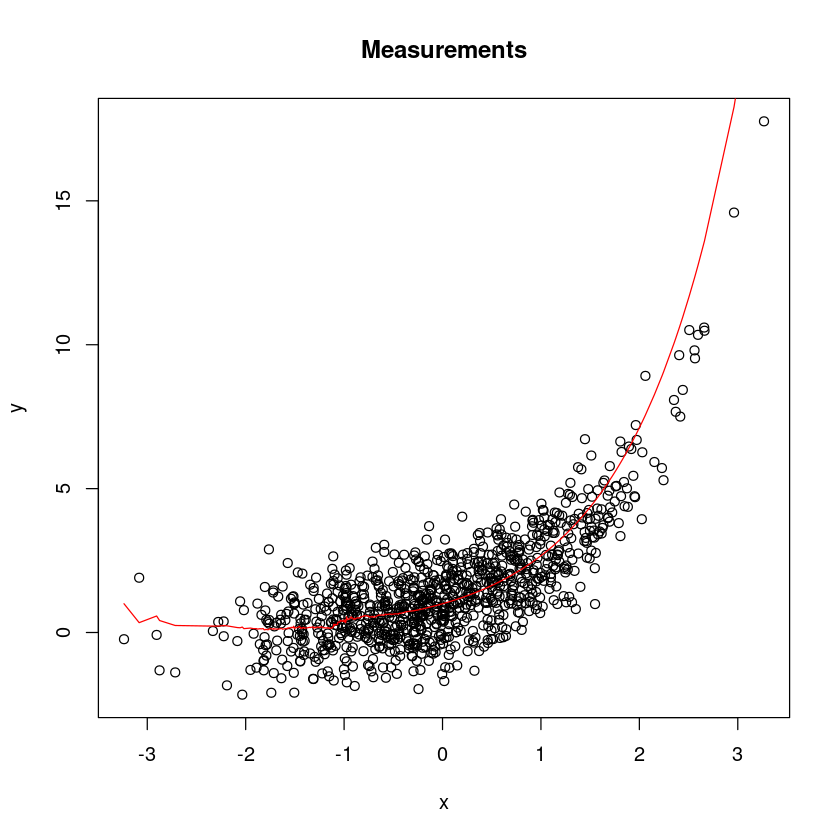

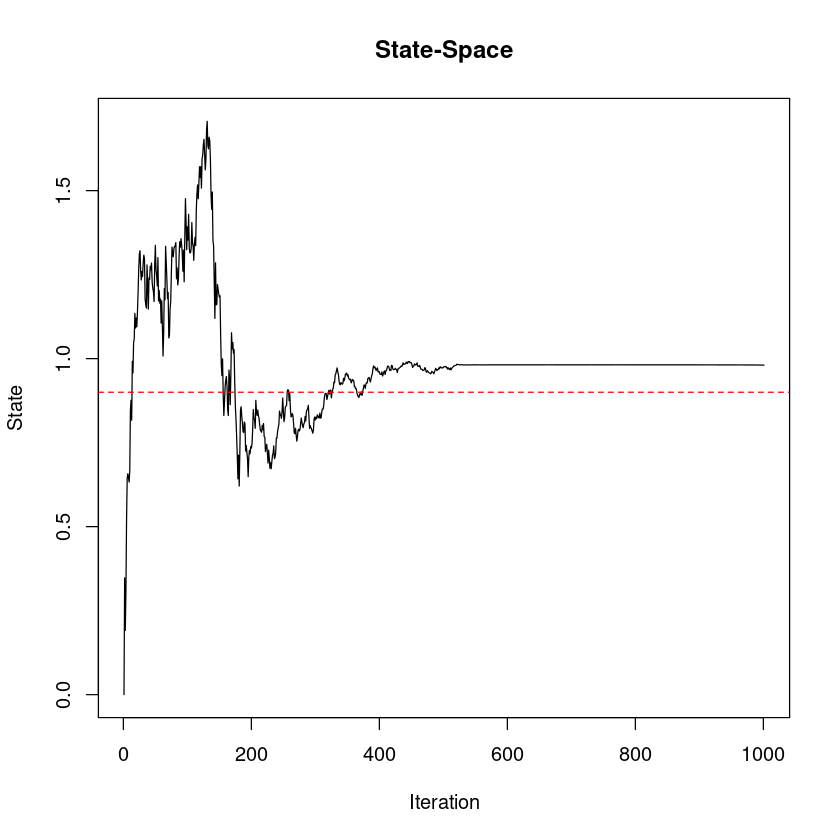

In [14]:
##################################################################################################################
############################# EXTENDED KALMAN FILTER SIMULATION  #################################################
##################################################################################################################

# recursive non linear regression
# additional observations
# first try
n <- 1000

# state of the model
beta_non_lin_est  <- numeric(n+1)

# generate covariable, just standard normal observations 
set.seed(0)
x  <- sort(rnorm(n))

# generate gaussian measurements
y_non_lin <- rnorm(n, mean= h(x, 0.9), 1)

# state variance 
Sig <- 1

# run the calculation for the extended kalman filter according to formula
for(i in 1:n){
    v  <- y_non_lin[i] - h(x[i], beta_non_lin_est[i])
    H <- h(x[i], beta_non_lin_est[i])/x[i]
    S  <- H * Sig * H + 1
    K  <- Sig * H / as.numeric(S)
    beta_non_lin_est[1+i]  <- beta_non_lin_est[i] + K * v
    Sig <- Sig - K*S*t(K)
}

# save grafics
plot(x, y_non_lin, 
    main = "Measurements",
    xlab = "x",
    ylab = "y"
)
lines(x, h(x, beta_non_lin_est[-n]), col='red')

plot(beta_non_lin_est, type='l',
 main = "State-Space",
 xlab = "Iteration",
 ylab = "State"
)
abline(h = 0.9, col = 'red', lty = 2)

The latter assumption can be tested by increasing the number of observations generated to 10000:

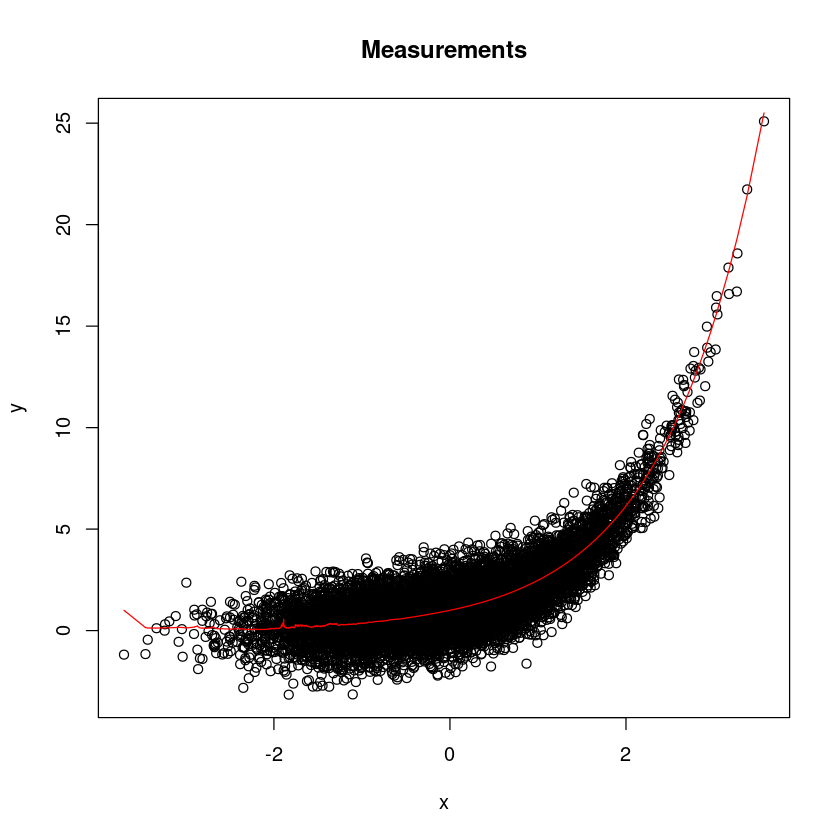

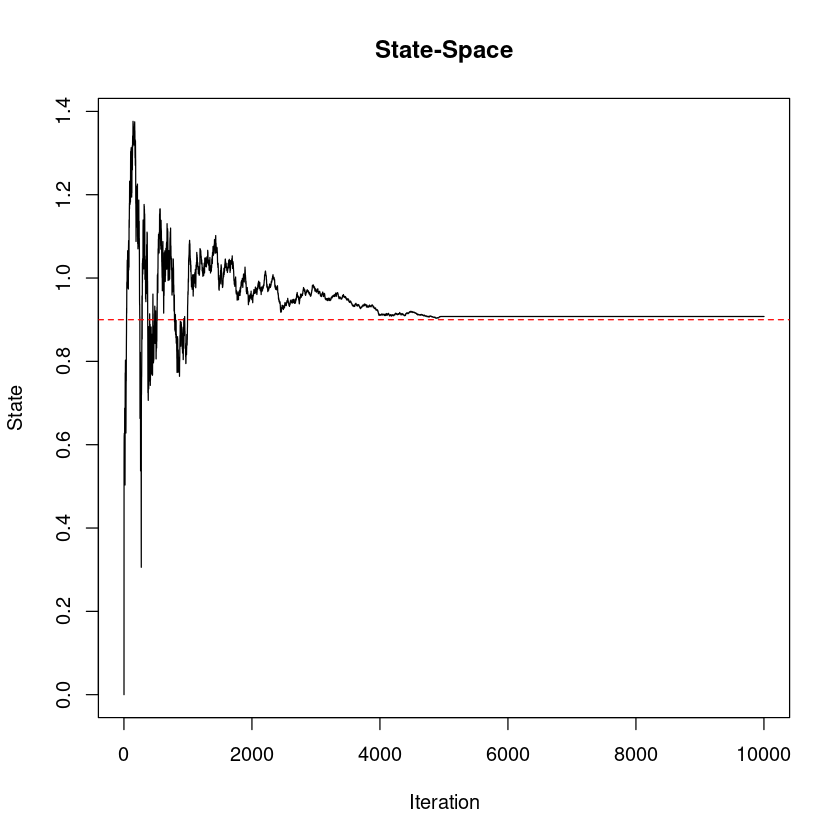

In [15]:

# recursive non linear regression
# additional observations
# second try increase n
n <- 10000

# state of the model
beta_non_lin_est  <- numeric(n+1)

# generate covariable, just standard normal observations 
set.seed(0)
x  <- sort(rnorm(n))

# generate gaussian measurements
y_non_lin <- rnorm(n, mean= h(x, 0.9), 1)

# state variance 
Sig <- 1

# run the calculation for the extended kalman filter according to formula
for(i in 1:n){
    v  <- y_non_lin[i] - h(x[i], beta_non_lin_est[i])
    H <- h(x[i], beta_non_lin_est[i])/x[i]
    S  <- H * Sig * H + 1
    K  <- Sig * H / as.numeric(S)
    beta_non_lin_est[1+i]  <- beta_non_lin_est[i] + K * v
    Sig <- Sig - K*S*t(K)
}

# save grafics
plot(x, y_non_lin, 
    main = "Measurements",
    xlab = "x",
    ylab = "y"
)
lines(x, h(x, beta_non_lin_est[-n]), col='red')

plot(beta_non_lin_est, type='l',
 main = "State-Space",
 xlab = "Iteration",
 ylab = "State"
)
abline(h = 0.9, col = 'red', lty = 2)
##################################################################################################################
############################# EXTENDED KALMAN FILTER SIMULATION END ##############################################
##################################################################################################################

As we can see, increasing the number of observations leads to a better estimation throughout the range of the x-values. 

Concluding, the Kalman-Filter is a closed form solution for linear-, and the Extended-Kalman-Filter an approximate solution for non-linear dynamic stochastic systems, given that state and process noise are gaussian. If the assumption of the gaussian distribution of either state or process is dropped, the Kalman-Filter is not applicable anymore, and a more general framework is required to handle non gaussian distributions.  

# Particle Filter

Given the state-space model and providing an explicit form of the model such as:

$$
\begin{align*}
    \textbf{x}_t &= \textbf{f}(\textbf{x}_{t-1}) + \varepsilon_{t-1} \\
    \textbf{y}_t &= \textbf{g}(\textbf{x}_{t}) + \nu_t \\
\end{align*}
$$

we might not be able to find an exact solution to either problem. Thus instead of trying to find an exact solution, we are interested in finding:

$$
\begin{equation*}
    \begin{aligned}
        \mathbb{E}[\textbf{y}_t] &= \mathbb{E}[\textbf{g}(\textbf{x}_{t})+ \nu_t] \\
        &= \mathbb{E}[\textbf{g}(\textbf{x}_{t})] \\
        &= \int  \textbf{g}(\textbf{x}_{t}) p(\textbf{x}_{t}|\textbf{y}_{1:t}) \textbf{dx}_t
    \end{aligned}
\end{equation*}
$$

assuming $\mathbb{E}[\nu_t] = 0$. If we can't evaluate this integral analytically or numerically, we can apply monte carlo integration due to the fact that:

$$
\begin{equation*} 
    \mathbb{E}[\textbf{g}(\textbf{x}_{t})] \approx \frac{1}{N} \sum_{i=1}^N \textbf{g}(\textbf{x}_{t}^{(i)})
\end{equation*}
$$

where $\textbf{x}_{t}^{(i)},\ i = 1,...,N$ are samples from $p(\textbf{x}_{t}|\textbf{y}_{1:t})$. If we are unable to sample from $p(\textbf{x}_{t}|\textbf{y}_{1:t})$, we can use importance sampling to evaluate $\mathbb{E}[\textbf{g}(\textbf{x}_{t})]$.

## Importance Sampling

The key idea behind importance sampling is to replace the sample of a random variable $\textbf{x}^{(i)} \sim G(\cdot)$, where $G(\cdot)$ is the target distribution, with sampling from an importance distribution $\textbf{x}^{(i)} \sim \pi(\cdot)$. The algorithm consists of the following steps:

* Draw samples from: $\textbf{x}^{(i)} \sim \pi(\cdot)$
* Calculate weights: $\textbf{w}^{*(i)}  = \frac{g(\textbf{x}^{(i)})}{\pi(\textbf{x}^{(i)})}$
* Normalize weights: $\textbf{w}^{(i)}  = \frac{\textbf{w}^{*(i)}}{\sum \textbf{w}^{*(i)}}$
* Calculate quantity of interest.

Applying this algorithm to calculate $\mathbb{E}[\textbf{g(x)}|\textbf{y}_{1:t}]$, we obtain the following results for calculating the weights:
$$
\begin{equation}
    \begin{aligned}
        \mathbb{E}[\textbf{g(x)}|\textbf{y}_{1:t}] &= \int  \textbf{g}(\textbf{x}) p(\textbf{x}|\textbf{y}_{1:t}) \textbf{dx} \\
                                 &= \int  \textbf{g}(\textbf{x}) \frac{p(\textbf{y}_{1:t}|\textbf{x}) p(\textbf{x}) }{\int p(\textbf{y}_{1:t}|\textbf{x})p(\textbf{x})} \textbf{dx} \\
                                 &=    \frac{ \int\textbf{g}(\textbf{x}) (\frac{p(\textbf{y}_{1:t}|\textbf{x}) p(\textbf{x}) }{\pi(\textbf{x})}) \pi(\textbf{x}) }
                                 {\int \frac{p(\textbf{y}_{1:t}|\textbf{x}) p(\textbf{x}) }{\pi(\textbf{x})} \pi(\textbf{x}) \textbf{dx}} \textbf{dx} \\
                                 &\approx \frac{ \frac{1}{N} \sum_{i=1}^N \textbf{g}(\textbf{x}^{(i)}) (\frac{p(\textbf{y}_{1:t}|\textbf{x}^{(i)}) p(\textbf{x}^{(i)}) }{\pi(\textbf{x}^{(i)}|\textbf{y}_{1:t})})  }
                                 {\frac{1}{N} \sum_{j=1}^N \frac{p(\textbf{y}_{1:t}|\textbf{x}^{(j)}) p(\textbf{x}^{(j)}) }{\pi(\textbf{x}^{(j)}|\textbf{y}_{1:t})} } \\
                                 &= \sum_{i=1}^N \bigg(\frac{  \frac{p(\textbf{y}_{1:t}|\textbf{x}^{(i)}) p(\textbf{x}^{(i)}) }{\pi(\textbf{x}^{(i)}|\textbf{y}_{1:t})}  }
                                 {\sum_{j=1}^N \frac{p(\textbf{y}_{1:t}|\textbf{x}_t^{(j)}) p(\textbf{x}_t^{(j)}) }{\pi(\textbf{x}^{(j)}|\textbf{y}_{1:t})} } \bigg)\textbf{g}(\textbf{x}^{(i)}) \\
    \end{aligned}
\end{equation}
$$

$$
\begin{equation*}
    w^{(i)} := \frac{  \frac{p(\textbf{y}_{1:t}|\textbf{x}^{(i)}) p(\textbf{x}^{(i)}) }{\pi(\textbf{x}_{t}^{(i)})}  }
    {\sum_{j=1}^N \frac{p(\textbf{y}_{1:t}|\textbf{x}^{(j)}) p(\textbf{x}^{(j)}) }{\pi(\textbf{x}^{(j)})} }
\end{equation*}
$$

Then:
$$
\begin{equation*}
    \mathbb{E}[\textbf{g(x)}|\textbf{y}_{1:t}] = \sum_{i=1}^N w^{(i)}\textbf{g}(\textbf{x}^{(i)})
\end{equation*}
$$

and the posterior density can be approximated according to: 
$$
\begin{equation*}
    p(\textbf{x}|\textbf{y}_{1:t}) \approx \sum_{i=1}^N w^{(i)}\delta(\textbf{x} - \textbf{x}^{(i)})
\end{equation*}
$$

## Example
Due to its critical role in the Particle-Filter, this section presents an example for the importance sampling algorithm. Let $X \sim \mathcal{N}(0,1)$ and assume further we are interested in calculating $\mathbb{E}[cos(X)^2]$. The first step in the importance sampling algorithm consists of choosing the importance density $\pi(x)$. To choose the importance density, we are interested in a density which is as "close" as possible to the quantity of interest, since theoretically all distributions for which $\mathcal{S}_X \subseteq \mathcal{S}_{\pi}$ are applicable as importance distributions.

The following figure presents different densities in the interval $x \in [-3,3]$. The black line depicts the function $cos(x)^2*dnorm(x)$, the green line is the density of a standard normal-, the red line the density of a Laplace $(\mu = 0, b=1)$ - and the blue line the density of a uniform $(-3,3)$ distributed random variable. The figure shows that the target density, the standard normal in this case, is not obviously the best density to choose from. The Laplace density is in certain areas closer to $cos(x)^2*dnorm(x)$ than the standard normal density. Using numeric integration we obtain: $\int_{-3}^3cos(x)^2*dnorm(x)dx \approx 0.5651$. Next we draw $1000$ samples from each distribution and calculate:

$$
\begin{equation*}
    \frac{1}{N} \frac{\sum_{i=1}^N cos(x^{(i)})^2*dnorm(x^{(i)})}{\pi(x^{(i)})} 
\end{equation*}
$$

for which we obtained $0.56$ for the Laplace-, $0.56$ for the standard normal- and $0.55$ for the uniform distribution. Hence they are all close to the numeric solution, but the Laplace distribution is the closest. Thus we would choose the Laplace distribution as the importance distribution.

[1] 0.6355556

[1] 0.5900178

[1] 0.5835453

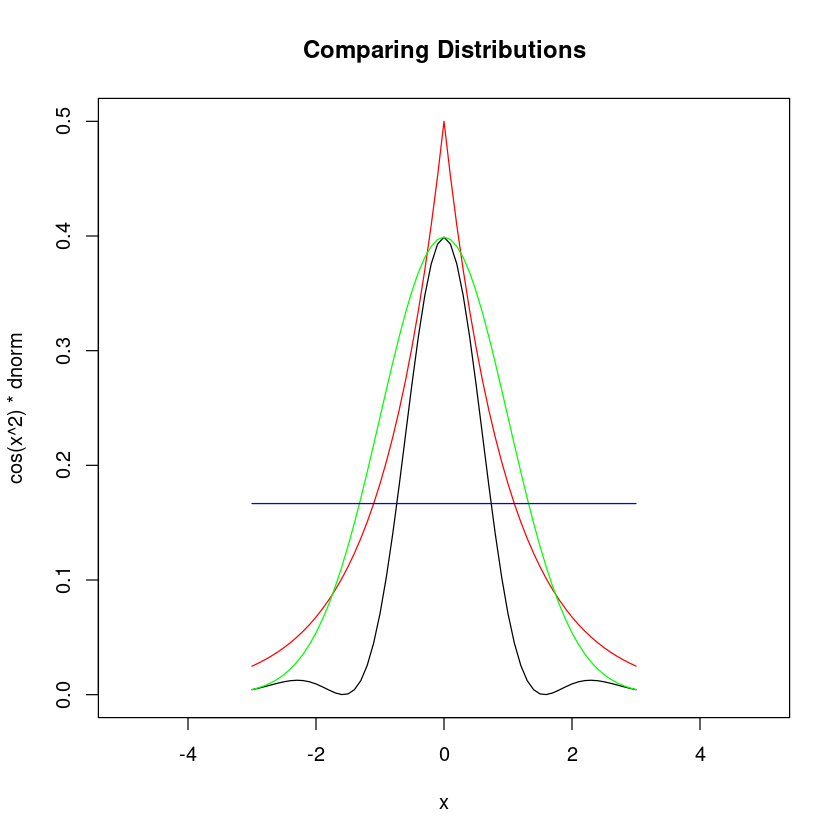

In [3]:
##################################################################################################################
#############################     PARTICLE FILTER SIMULATION     #################################################
##################################################################################################################

# importance sampling example

set.seed(0)
# generate x-values in the range of -3,3
x <- seq(-3,3,by=0.1)

# plot importance densities and target function
plot(x, f(x)*dnorm(x), type='l', xlim=c(-5,5), ylim=c(0,0.5), 
    main="Comparing Distributions",
    ylab = "cos(x^2) * dnorm"
)
lines(x, dlaplace(x),col='red')
lines(x, dnorm(x),col='green')
lines(x, dunif(x, -3,3),col='blue')

# perform monte carlo integration to calculate the expected values
n <- length(x)
set.seed(0)
norm_samples  <- rnorm(n)
lapl_samples <- rlaplace(1, runif(n))
unif_samples_2 <- runif(n, -3, 3)
mean( f(lapl_samples) * dnorm(lapl_samples) / dlaplace(lapl_samples, 1, 0))
mean( f(unif_samples_2) * dnorm(unif_samples_2) / dunif(unif_samples_2, -3, 3))
mean( f(norm_samples) * dnorm(norm_samples) / dnorm(norm_samples))

# end example


## Sequential Importance Sampling
To solve the estimation problem:
$$
\begin{equation*}
    \begin{aligned}
        p(\textbf{x}_{0:t}|\textbf{y}_{1:t}) &\propto p(\textbf{y}_{t}|\textbf{x}_{0:t},\textbf{y}_{1:t-1}) \\
                                             &= p(\textbf{y}_{t}|\textbf{x}_{t})p(\textbf{x}_{t}|\textbf{x}_{0:t-1}, \textbf{y}_{1:t-1}) \\
                                             &= p(\textbf{y}_{t}|\textbf{x}_{t})p(\textbf{x}_{t}|\textbf{x}_{t-1}) p(\textbf{x}_{0:t-1}|\textbf{y}_{1:t-1}) \\
    \end{aligned}
\end{equation*}
$$

where the quantity $p(\textbf{x}_{0:t}|\textbf{y}_{1:t})$ was decomposed into 2 objects for which there is a model $p(\textbf{y}_{t}|\textbf{x}_{t})p(\textbf{x}_{t}|\textbf{x}_{t-1})$ and one which is assumed to be known $p(\textbf{x}_{0:t-1}|\textbf{y}_{1:t-1})$. Since these quantities might be too difficult to calculate analytically, we can apply the importance sample algorithm sequentially and draw samples $\textbf{x}_t^{(i)} \sim \pi(\textbf{x}_{0:t}|\textbf{y}_{1:t})$ 
$$
\begin{equation*}
    \pi(\textbf{x}_{0:t}|\textbf{y}_{1:t}) = \pi(\textbf{x}_{t}|\textbf{x}_{0:t-1},\textbf{y}_{1:t})\pi(\textbf{x}_{0:t-1}|\textbf{y}_{1:t})
\end{equation*}
$$
and we obtain:
$$
\begin{equation*}
    \begin{aligned}
        w_t^{(i)} &\propto \frac{p(\textbf{y}_{t}|\textbf{x}_{t}^{(i)})p(\textbf{x}_{t}^{(i)}|\textbf{x}_{t-1}^{(i)}) }{\pi(\textbf{x}_{t}^{(i)}|\textbf{x}_{0:t-1}^{(i)},\textbf{y}_{1:t})} \frac{p(\textbf{x}_{0:t-1}^{(i)}|\textbf{y}_{1:t-1})}{\pi(\textbf{x}_{0:t-1}^{(i)}|\textbf{y}_{1:t})} \\
        w_{t-1}^{(i)} &\propto \frac{p(\textbf{x}_{0:t-1}^{(i)}|\textbf{y}_{1:t-1})}{\pi(\textbf{x}_{0:t-1}^{(i)}|\textbf{y}_{1:t})} \\
        w_t^{(i)} &\propto  w_{t-1}^{(i)} \frac{p(\textbf{y}_{t}|\textbf{x}_{t}^{(i)})p(\textbf{x}_{t}^{(i)}|\textbf{x}_{t-1}^{(i)}) }{\pi(\textbf{x}_{t}^{(i)}|\textbf{x}_{0:t-1}^{(i)},\textbf{y}_{1:t})}
    \end{aligned}
\end{equation*}
$$

Note that if we choose $\pi(\textbf{x}_{t}^{(i)}|\textbf{x}_{0:t-1}^{(i)},\textbf{y}_{1:t}) = p(\textbf{x}_{t}^{(i)}|\textbf{x}_{t-1}^{(i)}) $ then the problem simplifies to:

$$
\begin{equation*}
        w_t^{(i)} \propto  w_{t-1}^{(i)} p(\textbf{y}_{t}|\textbf{x}_{t}^{(i)})
\end{equation*}
$$


## Sequential Importance Resampling
Applying the sequential importance sampling leads to a phenomenon called the degeneracy problem. The degeneracy problem refers to the phenomenon that when applying the importance sampling algorithm sequentially, it leads to all but one weight to be close to $0$. To overcome this problem, adding a resampling procedure, where the samples form the posterior $\pi(\textbf{x}_{0:t}|\textbf{y}_{1:t})$ are drawn form the previous samples $\textbf{x}_t^{(i)}$ with the probabilities given by $w_t^{(i)}$. These samples are also referred to as particles \citep{sarkka2013bayesian} and thus the name Particle-Filter for the sequential importance resample algorithm. In the following we present two examples of the Particle-Filter at work. 

## Particle-Filter Example

For the first example we generate data according to:

$$
\begin{equation*}
    \begin{aligned}
        x_t  &= 0.5*x_{t-1} + 25*x_{t-1}/(1 + x_{t-1}^2) + 8*cos(1.2*(t-1)) + \varepsilon_{t-1},\ \varepsilon_{t-1} \sim \mathcal{N}(0,1)\\
        y_t  &= x_t^2/20 + \nu_t, \ \nu_t \sim \mathcal{N}(0,1)
    \end{aligned}
\end{equation*}
$$

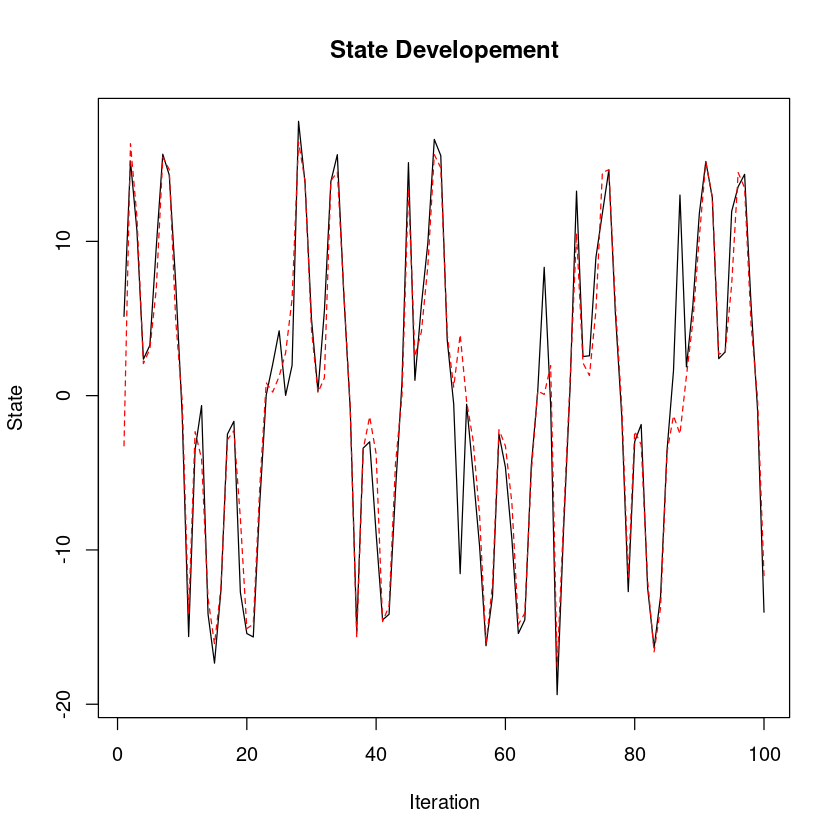

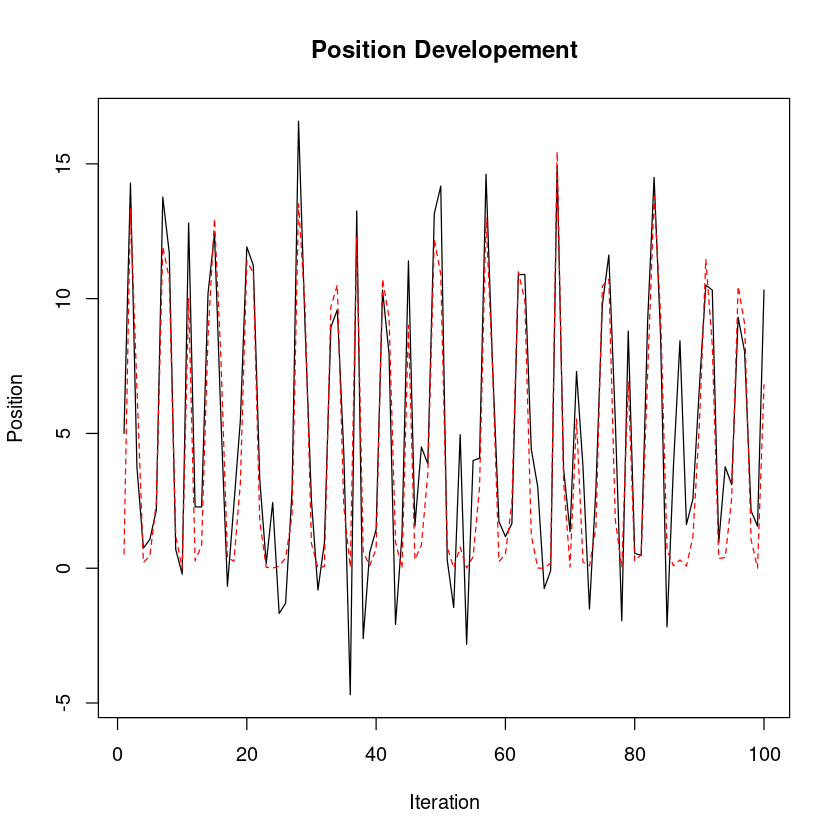

In [4]:
# particle filter simulatin example 1

# init state
x <- 0.1
# process noise
x_N <- 1 
# measurement noise
x_R <- 1
# duration
T <- 100
# num particles
N <- 1000
# init var
V <- 2

# save variables
z_out <- numeric(T)
x_out <- numeric(T)
x_est <- numeric(T)
x_est_out <- numeric(T)
weight <- numeric(N)


set.seed(0)
# init particles
particles <- rnorm(N, x, sqrt(V))

for(t in 1:T){
    x  <- rnorm(1, state_update(x,t-1), x_N)
    z <- rnorm(1, measurement_update(x), 2)

    for(i in 1:N){
        particles[i] <- rnorm(1, state_update(particles[i],t-1), x_N)
        z_update <- measurement_update(particles[i])
        weight[i] <- dnorm(z, z_update, 2)
    }
    weight  <- weight / sum(weight)
    particles <- sample(particles, size=N, replace=TRUE, prob=weight)
    x_est <- mean(particles)
    x_out[t] <- x
    z_out[t] <- z
    x_est_out[t] <- x_est
}

plot(x_out, type='l', main="State Developement", xlab= "Iteration", ylab = "State")
lines(x_est_out, col='red', lty=2)

plot(z_out, type='l', main="Position Developement", xlab= "Iteration", ylab = "Position")
lines(measurement_update(x_est_out), col='red', lty=2)

For the second example we try to estimate the movement of the volatility index:

$$
\begin{equation*}
    \begin{aligned}
        x_t  &=  0.69 + x_{t-1} + \varepsilon_{t-1},\ \varepsilon_{t-1} \sim \mathcal{N}(0,1.12)\\
        y_t  &= exp(x_t) + \nu_t, \ \nu_t \sim \mathcal{N}(0,0.78)
    \end{aligned}
\end{equation*}
$$

The data is obtained from the Federal Reserve Bank of St. Louis.

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


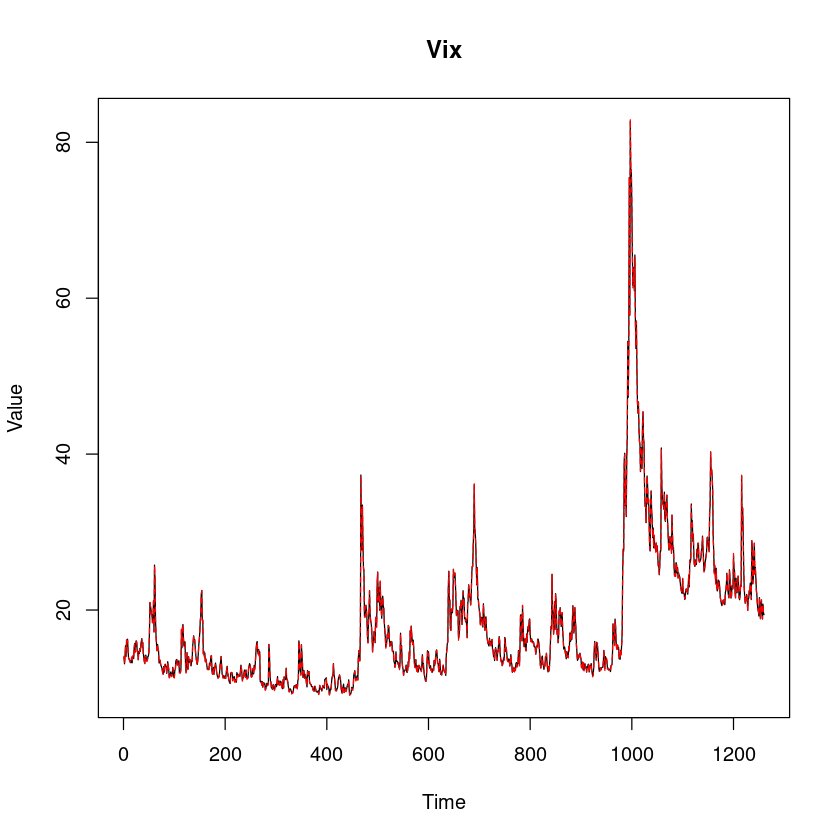

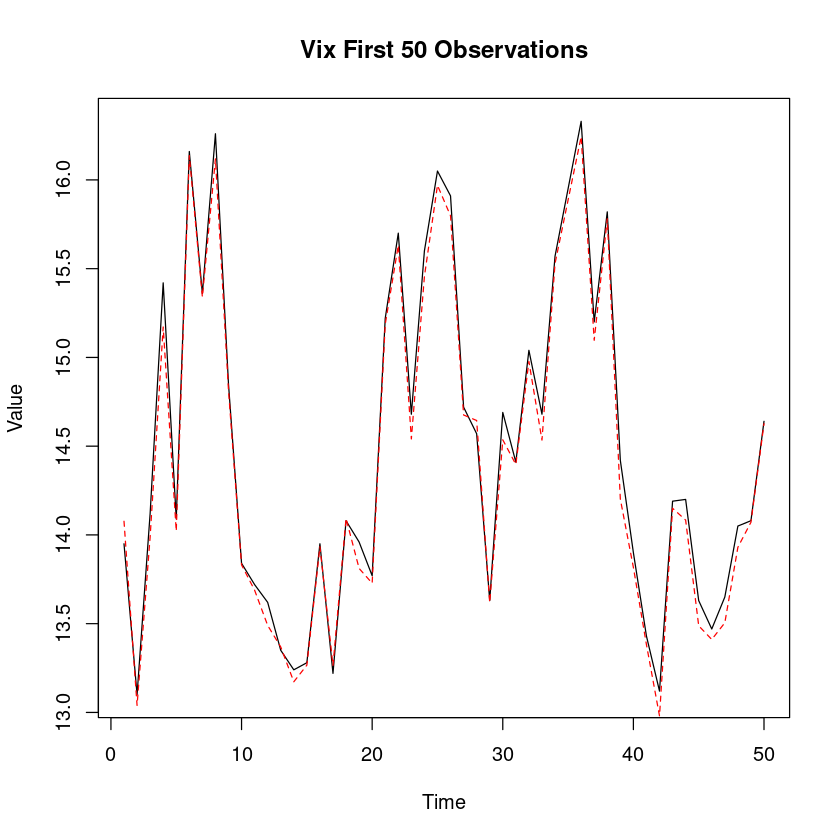

In [8]:
# exaple stochastic volatility model

# read data
vix_orig <- read.csv("./VIXCLS.csv")

# inspect data
# dim(vix_orig)
# head(vix_orig)
# tail(vix_orig)

# missing values?
vix <- as.numeric(as.character(vix_orig[,2]))

# remove missing values
vix <- vix[!is.na(vix)]

# init variables
n <- 1000
T  <- length(vix)

# model parameters
a <- 0.69
b <- 1
sig_v <- 1.12
B <- 0.89
sig_w <- 0.78

# save estimate
x_est_out <- numeric(T)
# state <-numeric(T)

set.seed(0)

# generate particles
particles <- rnorm(n, sd = sig_v)

# perform calculations
for(t in 1:T){
    particles <- rnorm(n, mean=stochastic_volatility_state(particles, a, b), sd = sqrt(sig_v))
    z_update <- stochastic_volatility_process(particles)
    weight <- dnorm(vix[t], z_update, sig_w)
    # weight <- weight * dnorm(z[t], z_update, sig_w)
    weight  <- weight / sum(weight)
    particles <- sample(particles, size=n, replace=TRUE, prob=weight)
    x_est <- mean(particles)
    x_est_out[t] <- x_est
}

# save results

plot(vix, type='l', main="Vix", xlab= "Time", ylab = "Value")
lines(stochastic_volatility_process(x_est_out), col='red', lty=2)

plot(vix[1:50], type='l', main="Vix First 50 Observations", xlab= "Time", ylab = "Value")
lines(stochastic_volatility_process(x_est_out)[1:50], col='red', lty=2)


These two figures depicts the results of the Vix estimation for the entire series. It looks like the original and the measurement are identical. The upper figure presents the original data and estimation for the first 50 observations. As we can see, they are not identical, but the model captures the movement of the observations very well.

# Conclusio

In this work we presented an overview of Bayesian filtering techniques by describing the Kalman- and Extended-Kalman-Filter as well as the Particle-Filter with simulation studies for each model. For gaussian models we have seen that there exists a closed- or approximately closed form solution (Kalman-, Extended-Kalman-Filter respectively). Dropping the assumption of the gaussian distribution lead to a more flexible framework that can handle different distributional forms by relying on Monte Carlo techniques.   
